In [1]:
import numpy as np
import pandas as pd
import re
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('wine_data.sqlite')
c = conn.cursor()


In [3]:
wine_df = pd.read_sql('Select * from wine_data', conn)
wine_df = wine_df.drop(['index', 'description', 'province', 'title', 'winery'], axis=1)
wine_df = wine_df[['country', 'variety', 'color', 'rating', 'price']]
wine_df.head()

,country,variety,color,rating,price
0,Portugal,Portuguese Red,red,87,15.0
1,US,Pinot Gris,white,87,14.0
2,US,Riesling,white,87,13.0
3,US,Pinot Noir,red,87,65.0
4,France,Gewürztraminer,white,87,24.0


In [4]:
wine_df = wine_df[wine_df["price"] < 200]


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
    def fit(self,X,y=None):
        return self 
    
    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [6]:
wine_df = MultiColumnLabelEncoder(columns = ['country','variety', 'color']).fit_transform(wine_df)
wine_df.head()

,country,variety,color,rating,price
0,28,34,1,87,15.0
1,37,31,2,87,14.0
2,37,39,2,87,13.0
3,37,32,1,87,65.0
4,12,15,2,87,24.0


In [7]:
data = wine_df[["country", "variety", "color", "price"]]
target = wine_df["rating"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.1710748452447946

In [10]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [83 88 85 88 85 88 90 87 88 90]
First 10 Actual labels: [93, 88, 85, 88, 87, 88, 87, 91, 88, 88]


Text(0.5, 1.0, 'Residual Plot')

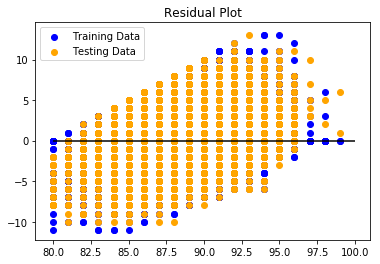

In [11]:
plt.scatter(rf.predict(X_train), rf.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rf.predict(X_test), rf.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=target.min(), xmax=target.max())
plt.title("Residual Plot")